In [6]:
import requests
import pandas as pd
import urllib3
import socket

from datetime import date, datetime
import matplotlib
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm.notebook import tqdm

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
## force ipv4 since default ipv6 is slow at first connection on cwb's server
requests.packages.urllib3.util.connection.allowed_gai_family = lambda : socket.AF_INET

# matplotlib.rcParams['font.family'] = ['Heiti TC']

def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)
def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)
# from custom.exp1 import *
from custom.weather import *

## Get all station codes (所有測站代碼）

In [2]:
url = "http://e-service.cwb.gov.tw/wdps/obs/state.htm"
df = pd.read_html(url);df

[         站號      站名  海拔高度(m)          經度         緯度   城市  \
 0    466850  五分山雷達站    756.0  121.781205  25.071182  新北市   
 1    466880      板橋      9.7  121.442017  24.997647  新北市   
 2    466900      淡水     19.0  121.448906  25.164889  新北市   
 3    466910      鞍部    837.6  121.529731  25.182586  臺北市   
 4    466920      臺北      5.3  121.514853  25.037658  臺北市   
 ..      ...     ...      ...         ...        ...  ...   
 603  C1Z110      三棧    680.0  121.605010  24.115570  花蓮縣   
 604  C1Z120      壽豐     62.0  121.508081  23.870853  花蓮縣   
 605  C1Z130      銅門    187.0  121.492842  23.965694  花蓮縣   
 606  C1Z140      荖溪    950.0  121.459640  23.890575  花蓮縣   
 607  C1Z240    中平林道   1163.0  121.267630  23.421150  花蓮縣   
 
                              地址      資料起始日期  撤站日期  \
 0                  瑞芳區靜安路四段1巷1號  1998/07/01   NaN   
 1               板橋區大觀路二段265巷62號  1972/03/01   NaN   
 2                  淡水區中正東路42巷6號  1942/01/01   NaN   
 3                北投區陽明山竹子湖路111號  1937/01/01   NaN

In [3]:
df = pd.DataFrame(df[0]);df

,站號,站名,海拔高度(m),經度,緯度,城市,地址,資料起始日期,撤站日期,備註,原站號,新站號
0,466850,五分山雷達站,756.0,121.781205,25.071182,新北市,瑞芳區靜安路四段1巷1號,1998/07/01,NaN,本站只有雷達觀測資料。,NaN,NaN
1,466880,板橋,9.7,121.442017,24.997647,新北市,板橋區大觀路二段265巷62號,1972/03/01,NaN,原為探空站，自2002年開始進行氣象觀測。因受附近興建合宜住宅影響，日照觀測自民國104年起...,NaN,NaN
2,466900,淡水,19.0,121.448906,25.164889,新北市,淡水區中正東路42巷6號,1942/01/01,NaN,NaN,NaN,NaN
3,466910,鞍部,837.6,121.529731,25.182586,臺北市,北投區陽明山竹子湖路111號,1937/01/01,NaN,NaN,NaN,NaN
4,466920,臺北,5.3,121.514853,25.037658,臺北市,中正區公園路64號,1896/01/01,NaN,2014至2015氣候年報之氣壓計海面上高度應為30.3m(2014/10/25搬遷，6.6...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
603,C1Z110,三棧,680.0,121.605010,24.115570,花蓮縣,秀林鄉雙露山,2017/12/01,NaN,原(C1Z090)站因移位，於2017/12/1變更為(C1Z110)站。,C1Z090,NaN
604,C1Z120,壽豐,62.0,121.508081,23.870853,花蓮縣,壽豐鄉壽豐村壽山路37號(壽豐鄉文康中心),2017/06/03,NaN,原(C1T890)站因移位，於2017/6/3變更為(C1Z120)站。,C1T890,NaN
605,C1Z130,銅門,187.0,121.492842,23.965694,花蓮縣,秀林鄉銅門村69號(銅門國小),2017/06/03,NaN,原(C1T860)站因移位，於2017/6/3變更為(C1Z130)站。,C1T860,NaN
606,C1Z140,荖溪,950.0,121.459640,23.890575,花蓮縣,秀林鄉,2018/03/23,NaN,NaN,NaN,NaN


In [4]:
df.head(10)

,站號,站名,海拔高度(m),經度,緯度,城市,地址,資料起始日期,撤站日期,備註,原站號,新站號
0,466850,五分山雷達站,756.0,121.781205,25.071182,新北市,瑞芳區靜安路四段1巷1號,1998/07/01,NaN,本站只有雷達觀測資料。,NaN,NaN
1,466880,板橋,9.7,121.442017,24.997647,新北市,板橋區大觀路二段265巷62號,1972/03/01,NaN,原為探空站，自2002年開始進行氣象觀測。因受附近興建合宜住宅影響，日照觀測自民國104年起...,NaN,NaN
2,466900,淡水,19.0,121.448906,25.164889,新北市,淡水區中正東路42巷6號,1942/01/01,NaN,NaN,NaN,NaN
3,466910,鞍部,837.6,121.529731,25.182586,臺北市,北投區陽明山竹子湖路111號,1937/01/01,NaN,NaN,NaN,NaN
4,466920,臺北,5.3,121.514853,25.037658,臺北市,中正區公園路64號,1896/01/01,NaN,2014至2015氣候年報之氣壓計海面上高度應為30.3m(2014/10/25搬遷，6.6...,NaN,NaN
5,466930,竹子湖,607.1,121.544547,25.162078,臺北市,北投區陽明山竹子湖路2號,1937/01/01,NaN,NaN,NaN,NaN
6,466940,基隆,26.7,121.740475,25.133314,基隆市,仁愛區港西街6號6樓(海港大樓6樓),1946/01/01,NaN,NaN,NaN,NaN
7,466950,彭佳嶼,101.7,122.079744,25.627975,基隆市,中正區彭佳嶼,1910/01/01,NaN,NaN,NaN,NaN
8,466990,花蓮,16.1,121.613275,23.975128,花蓮縣,花蓮市花崗街24號,1910/01/01,NaN,NaN,NaN,NaN
9,467050,新屋,20.6,121.047486,25.006744,桃園市,新屋區東興路二段946號,2013/07/01,NaN,座標及高度於2013/10/09更正。2020/01/01至2020/02/15因施工部分觀...,NaN,NaN


In [112]:
df[df.iloc[:, 0]=="C0A940"]

,站號,站名,海拔高度(m),經度,緯度,城市,地址,資料起始日期,撤站日期,備註,原站號,新站號
48,C0A940,金山,49.0,121.643967,25.223628,新北市,金山區中興段404地號(磺港社區活動中心內),1994/08/29,NaN,NaN,NaN,NaN


## Download weather data from all station

In [ ]:
temp = {}
for idx, row in tqdm(df.iterrows()):
    code = row[0]
    print(idx, code, row[1])
    temp[code] = get_historical_weather(code, y_start=2015, y_end=2020, verbose=True)
df_record = pd.concat(temp)
df_record.shape

In [ ]:
rmax(100)
cmax(100)
df_record.head(100)

## save and load pickle file

In [10]:
df_record.to_pickle('weather_allstation_20150101-20201227.bz2')

In [11]:
df_record.shape

(1328352, 34)

In [2]:
# df_record = pd.read_pickle('weather_allstation_2015-2020.bz2')

## Remove records from station only have precip. data
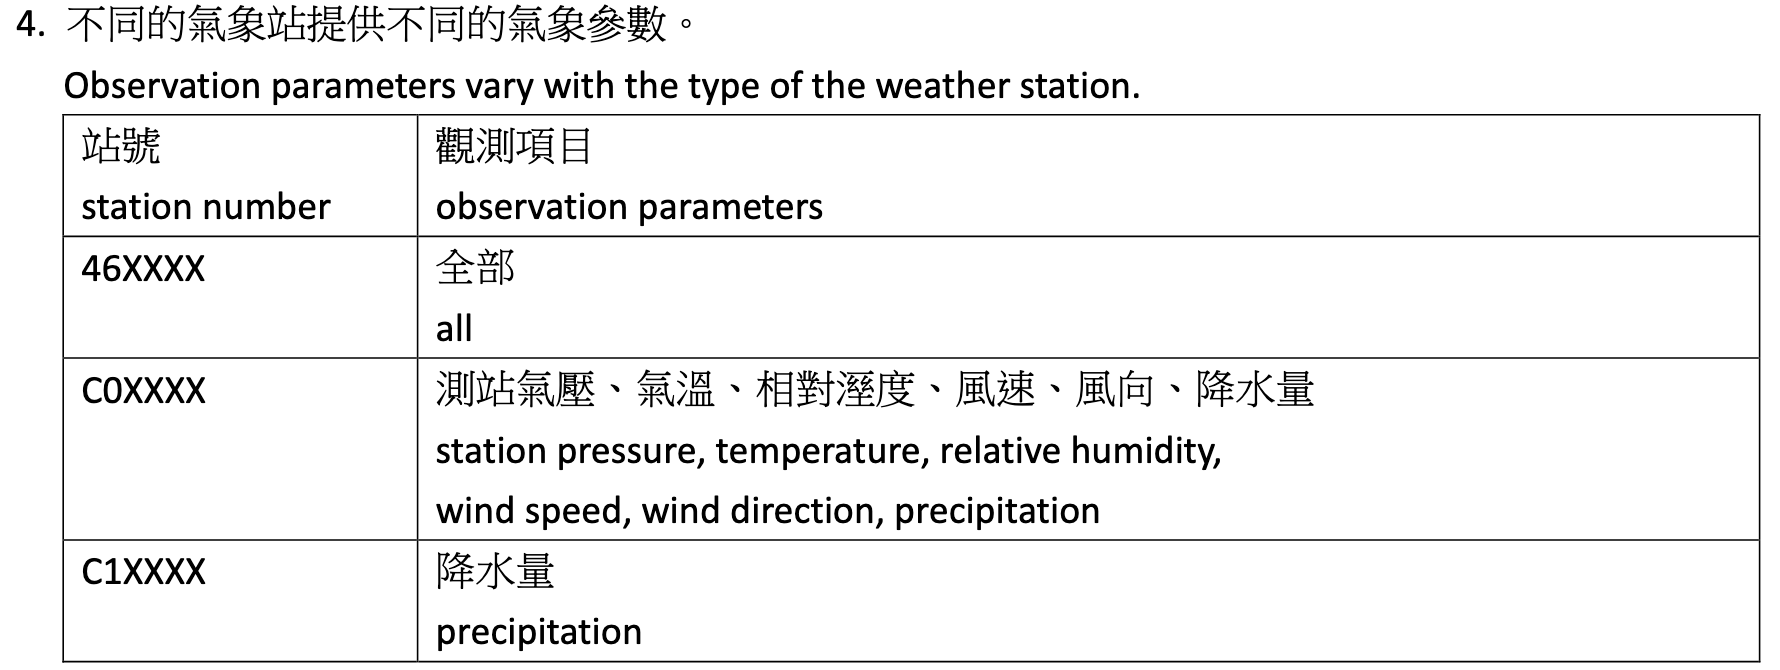

In [12]:
df_record.index.get_level_values(0).str.match(r'C1.*').sum()

304688

In [13]:
## remove station which only have precipitation data
df_record.index.names = ['stn_code', 'date']
df_record.columns.name = None
df_record = df_record[~df_record.index.get_level_values(0).str.match(r'C1.*')]

### see which stations/dates have most of the missing values

In [14]:
## make a new df with string parsed to number (check what/where the non-numeric values are)
df_record2 = df_record.apply(pd.to_numeric, errors='coerce')

In [15]:
## remove columns of recording time of event maxima 
cols = df_record2.columns
df_record2.columns.name = None
dropcols = cols[cols.str.match(r'.*Time')]
df_record2.drop(columns=dropcols, inplace=True)

In [16]:
## add month/year columns for later merge/filter
df_record2['month'] = df_record2.index.get_level_values(1).month
df_record2['year'] = df_record2.index.get_level_values(1).year

In [17]:
## remove last rows (days at the end of query period, not yet recorded)
df_record2.dropna(axis=0, how='all', inplace=True)

<AxesSubplot:>

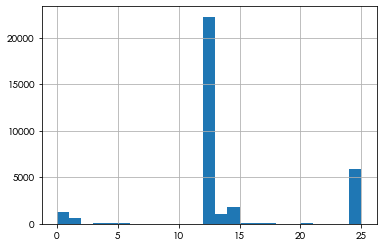

In [18]:
## show the average number of missing data per day(row-wise) and group by month and station
nacount=df_record2.isna().sum(axis=1).groupby(['stn_code', pd.Grouper(freq='M', level='date')]).mean()
nacount=pd.DataFrame(nacount)
nacount['month'] = nacount.index.get_level_values(1).month
nacount['year'] = nacount.index.get_level_values(1).year

nacount[0].hist(bins=25)

In [22]:
## see how the entries with missing data looks like
n_missing = 25
temp = nacount[(nacount[0]>=n_missing) & (nacount[0]<n_missing+1)].reset_index(level=0).drop(columns=0).iloc[:1, :]

# cmax(100)
pd.merge(temp, df_record2.reset_index(),  on=['stn_code', 'month', 'year'], how='left', indicator=True)

,stn_code,month,year,date,StnPres,SeaPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,Td dew point,RH,RHMin,WS,WD,WSGust,WDGust,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,Cloud Amount,_merge
0,467270,1,2015,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,467270,1,2015,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
2,467270,1,2015,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
3,467270,1,2015,2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
4,467270,1,2015,2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
5,467270,1,2015,2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
6,467270,1,2015,2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
7,467270,1,2015,2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
8,467270,1,2015,2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
9,467270,1,2015,2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both


In [23]:
## remove entries (station at given months) have high missing data (>25 NA per day)
## or keep all the see what are those non-numerical values
df_orig = df_record2.reset_index()
df_drop = nacount[nacount[0]>=25].reset_index(level=0).drop(columns=0)
df_new = pd.merge(df_orig, df_drop, on=['stn_code', 'month', 'year'], how='left', indicator=True)
# df_new = df_new[df_new._merge=='left_only']

In [24]:
## remove columns where >90% of observations don't have such data
na_pct = 100*df_new.isna().sum()/df_new.shape[0]
na_pct

stn_code         0.000000
date             0.000000
StnPres         18.452148
SeaPres         93.570156
StnPresMax      19.170744
StnPresMin      19.174358
Temperature     18.495327
T Max           19.282890
T Min           19.300669
Td dew point    93.573673
RH              24.177269
RHMin           23.985409
WS              18.518772
WD              18.527466
WSGust          19.187644
WDGust          19.187253
Precp           18.740036
PrecpHour       93.689531
PrecpMax10      93.841827
PrecpMax60      93.832937
SunShine        93.436714
SunShineRate    93.578850
GloblRad        93.592917
VisbMean        94.245573
EvapA           94.672373
UVI Max         95.751926
Cloud Amount    94.301255
month            0.000000
year             0.000000
_merge           0.000000
dtype: float64

In [25]:
dropcols = list(na_pct[na_pct>90].index)
dropcols.append('_merge')
df_new.drop(columns=dropcols, inplace=True)
df_new

,stn_code,date,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,WS,WD,WSGust,WDGust,Precp,month,year
0,466880,2015-01-01,1026.7,1028.9,1023.6,13.8,16.1,12.2,56.0,46.0,3.8,70.0,13.4,80.0,0.0,1,2015
1,466880,2015-01-02,1025.1,1027.0,1022.3,14.3,17.8,11.9,57.0,48.0,3.5,70.0,14.3,70.0,0.0,1,2015
2,466880,2015-01-03,1020.7,1024.6,1018.2,16.2,21.4,12.9,60.0,44.0,2.0,60.0,8.3,80.0,0.0,1,2015
3,466880,2015-01-04,1016.4,1018.3,1014.3,15.9,23.4,11.1,76.0,44.0,0.6,200.0,4.6,40.0,0.0,1,2015
4,466880,2015-01-05,1014.1,1016.4,1012.7,16.7,24.4,12.1,81.0,51.0,0.5,200.0,3.2,210.0,0.0,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023659,C0Z330,2020-12-27,963.9,965.3,962.4,16.9,20.4,14.6,84.0,65.0,0.7,345.0,6.4,360.0,22.0,12,2020
1023660,C0Z330,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020
1023661,C0Z330,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020
1023662,C0Z330,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020


In [26]:
df_new.set_index(['stn_code', 'date'], inplace=True)
# df_record2.xs(slice('2016-05-01','2016-05-31'), level='date').loc['C0F0A0'].isna().sum(axis=1)

In [27]:
cols = df_new.columns.drop(['month', 'year'])
df_old = df_record.loc[df_new.index, cols]

In [28]:
nan = df_old[df_new.isna().any(axis=1)]
nan.apply(lambda x: x[pd.to_numeric(x, errors='coerce').isna()].unique())

StnPres           [..., X, /]
StnPresMax        [..., X, /]
StnPresMin        [..., X, /]
Temperature       [..., X, /]
T Max             [..., X, /]
T Min             [..., X, /]
RH                [..., X, /]
RHMin             [..., X, /]
WS                [..., X, /]
WD                [..., X, /]
WSGust            [..., X, /]
WDGust            [..., X, /]
Precp          [T, ..., X, /]
dtype: object

From the https://e-service.cwb.gov.tw/HistoryDataQuery/downloads/Readme.pdf 

T表示微量(小於0.1mm)，x 表故障，V 表風向不定，/表不明，...表無觀測

In [29]:
df_old.columns

Index(['StnPres', 'StnPresMax', 'StnPresMin', 'Temperature', 'T Max', 'T Min',
       'RH', 'RHMin', 'WS', 'WD', 'WSGust', 'WDGust', 'Precp'],
      dtype='object')

In [30]:
df_old[df_old.StnPres=='/']

StnPres StnPresMax StnPresMin Temperature T Max T Min  \
stn_code date                                                               
C0A540   2020-12-15       /        ...        ...           /   ...   ...   
C0A560   2018-10-12       /        ...        ...           /   ...   ...   
C0A920   2019-02-10       /        ...        ...           /   ...   ...   
         2019-02-12       /        ...        ...           /   ...   ...   
         2019-03-19       /        ...        ...           /   ...   ...   
...                     ...        ...        ...         ...   ...   ...   
C0Z070   2017-03-23       /     1098.8      805.4        18.6  19.6  16.5   
C0Z220   2018-01-05       /      953.3      948.1           /  18.9  13.2   
C0Z310   2018-01-30       /     1014.2     1012.0           /  17.3  15.0   
C0Z320   2018-03-18       /      946.5      942.6           /  24.1  16.4   
C0Z330   2018-03-16       /      964.6      959.6           /  23.0  16.3   

                      RH RHMin   WS   WD WSGust WDGust Precp  
stn_code date                                                 
C0A540   2020-12-15    /   ...    /    /    ...    ...   1.0  
C0A560   2018-10-12    /   ...    /    /    ...    ...  45.0  
C0A920   2019-02-10    X   ...    X    X    ...    ...     X  
         2019-02-12    X   ...    X    X    ...    ...  15.0  
         2019-03-19    /   ...    X    X    ...    ...   0.0  
...                  ...   ...  ...  ...    ...    ...   ...  
C0Z070   2017-03-23  ...     /  1.4  344    7.3    359   5.0  
C0Z220   2018-01-05    /    76    /    /    2.1     94   0.5  
C0Z310   2018-01-30    /    67    /    /    4.6    219   0.5  
C0Z320   2018-03-18    /    57    /    /    5.3     58   0.0  
C0Z330   2018-03-16    /    74    /    /    7.8    339   0.0  

[1082 rows x 13 columns]

In [31]:
df_new[(df_new.WD==0) & df_new.WD!=0]

,,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,WS,WD,WSGust,WDGust,Precp,month,year
stn_code,date,,,,,,,,,,,,,,,


## rewrite the data cleaning function

In [32]:
keepcols = ['StnPres', 'StnPresMax', 'StnPresMin', 'Temperature', 'T Max', 'T Min',
       'RH', 'RHMin', 'WS', 'WD', 'WSGust', 'WDGust', 'Precp']
dropcols = [c for c in df_record.columns if c not in keepcols]

In [33]:
def cleanup_weather(df):
    
    ## keep only columns have enough data (>20% observations were not NA)
    keepcols = ['StnPres', 'StnPresMax', 'StnPresMin', 'Temperature', 'T Max', 'T Min',
       'RH', 'RHMin', 'WS', 'WD', 'WSGust', 'WDGust', 'Precp']
    dropcols = [c for c in df_record.columns if c not in keepcols]    
    df.drop(columns=dropcols, inplace=True)
    
    ## Fix T (trace) value in Precp
    df.update(df.filter(regex='^Precp.*').replace('T', '0')) 

    ## Convert string to numeric value (..., X, / will become NA)
    df = df.apply(pd.to_numeric, errors='coerce')
    
    ## calculate some additional features
    df['PresDif'] = df.StnPresMax - df.StnPresMin
    df['TempDif'] = df['T Max'] - df['T Min']
    df['RHDif'] = df['RH'] - df['RHMin']
    
    # WD = 0 means WS<0.2m/s --> ignore those values
    df['WD'] = df.WD.replace('0', 'NA')
    
    ## remove last days of the query period (future dates)
    df.dropna(axis=0, how='all', inplace=True)
    
    return df

In [34]:
df_record = cleanup_weather(df_record)
df_record

StnPres  StnPresMax  StnPresMin  Temperature  T Max  \
stn_code date                                                              
466880   2015-01-01   1026.7      1028.9      1023.6         13.8   16.1   
         2015-01-02   1025.1      1027.0      1022.3         14.3   17.8   
         2015-01-03   1020.7      1024.6      1018.2         16.2   21.4   
         2015-01-04   1016.4      1018.3      1014.3         15.9   23.4   
         2015-01-05   1014.1      1016.4      1012.7         16.7   24.4   
...                      ...         ...         ...          ...    ...   
C0Z330   2020-12-23    964.0       967.2       961.3         17.2   19.9   
         2020-12-24    962.2       965.3       960.1         17.5   20.7   
         2020-12-25    966.7       968.8       964.8         14.5   16.7   
         2020-12-26    965.7       968.0       963.0         17.2   24.9   
         2020-12-27    963.9       965.3       962.4         16.9   20.4   

                     T Min    RH  RHMin   WS     WD  WSGust  WDGust  Precp  \
stn_code date                                                                
466880   2015-01-01   12.2  56.0   46.0  3.8   70.0    13.4    80.0    0.0   
         2015-01-02   11.9  57.0   48.0  3.5   70.0    14.3    70.0    0.0   
         2015-01-03   12.9  60.0   44.0  2.0   60.0     8.3    80.0    0.0   
         2015-01-04   11.1  76.0   44.0  0.6  200.0     4.6    40.0    0.0   
         2015-01-05   12.1  81.0   51.0  0.5  200.0     3.2   210.0    0.0   
...                    ...   ...    ...  ...    ...     ...     ...    ...   
C0Z330   2020-12-23   15.9  99.0   99.0  0.5   28.0     3.2   353.0   23.5   
         2020-12-24   14.7  99.0   93.0  1.2  351.0     7.0   354.0    2.5   
         2020-12-25   13.4  99.0   99.0  1.2  350.0     7.3   357.0    0.5   
         2020-12-26   13.2  87.0   51.0  0.6   94.0     4.0   344.0    0.0   
         2020-12-27   14.6  84.0   65.0  0.7  345.0     6.4   360.0   22.0   

                     PresDif  TempDif  RHDif  
stn_code date                                 
466880   2015-01-01      5.3      3.9   10.0  
         2015-01-02      4.7      5.9    9.0  
         2015-01-03      6.4      8.5   16.0  
         2015-01-04      4.0     12.3   32.0  
         2015-01-05      3.7     12.3   30.0  
...                      ...      ...    ...  
C0Z330   2020-12-23      5.9      4.0    0.0  
         2020-12-24      5.2      6.0    6.0  
         2020-12-25      4.0      3.3    0.0  
         2020-12-26      5.0     11.7   36.0  
         2020-12-27      2.9      5.8   19.0  

[840690 rows x 16 columns]

## Finish prelimiary exploratory analysis and cleaning, save data

In [36]:
df_record.to_pickle("weather_all_cleaned_20201228.bz2")

In [3]:
df_record = pd.read_pickle('weather_all_cleaned.bz2')

In [4]:
df_record

StnPres  StnPresMax  StnPresMin  Temperature  T Max  \
stn_code date                                                              
466880   2015-01-01   1026.7      1028.9      1023.6         13.8   16.1   
         2015-01-02   1025.1      1027.0      1022.3         14.3   17.8   
         2015-01-03   1020.7      1024.6      1018.2         16.2   21.4   
         2015-01-04   1016.4      1018.3      1014.3         15.9   23.4   
         2015-01-05   1014.1      1016.4      1012.7         16.7   24.4   
...                      ...         ...         ...          ...    ...   
C0Z330   2020-11-22    966.1       968.3       964.3         22.6   30.6   
         2020-11-23    968.6       970.0       967.4         19.7   22.1   
         2020-11-24    968.3       969.9       966.7         19.1   21.0   
         2020-11-25    967.7       969.1       965.6         19.8   25.9   
         2020-11-26    967.9       969.6       965.7         20.1   25.1   

                     T Min    RH  RHMin   WS     WD  WSGust  WDGust  Precp  \
stn_code date                                                                
466880   2015-01-01   12.2  56.0   46.0  3.8   70.0    13.4    80.0    0.0   
         2015-01-02   11.9  57.0   48.0  3.5   70.0    14.3    70.0    0.0   
         2015-01-03   12.9  60.0   44.0  2.0   60.0     8.3    80.0    0.0   
         2015-01-04   11.1  76.0   44.0  0.6  200.0     4.6    40.0    0.0   
         2015-01-05   12.1  81.0   51.0  0.5  200.0     3.2   210.0    0.0   
...                    ...   ...    ...  ...    ...     ...     ...    ...   
C0Z330   2020-11-22   19.2  91.0   59.0  0.4   24.0     3.2    99.0    0.0   
         2020-11-23   18.9  99.0   89.0  1.4  352.0     8.4   345.0   13.5   
         2020-11-24   18.4  99.0   99.0  1.0  351.0     6.8     5.0   36.5   
         2020-11-25   17.4  94.0   69.0  0.6    4.0     5.9     1.0    1.5   
         2020-11-26   17.6  92.0   67.0  0.7   25.0     5.3   350.0    0.0   

                     PresDif  TempDif  RHDif  
stn_code date                                 
466880   2015-01-01      5.3      3.9   10.0  
         2015-01-02      4.7      5.9    9.0  
         2015-01-03      6.4      8.5   16.0  
         2015-01-04      4.0     12.3   32.0  
         2015-01-05      3.7     12.3   30.0  
...                      ...      ...    ...  
C0Z330   2020-11-22      4.0     11.4   32.0  
         2020-11-23      2.6      3.2   10.0  
         2020-11-24      3.2      2.6    0.0  
         2020-11-25      3.5      8.5   25.0  
         2020-11-26      3.9      7.5   25.0  

[826266 rows x 16 columns]

In [5]:
df_record.to_pickle("weather_all_cleaned.bz2")